<b><font size="6">04. Decision Trees</font></b><br><br>

In this notebook we are going to apply Decision Trees in Python.

# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1 - The needed steps](#1st-bullet)
* [2 - Building a Decision Tree](#2nd-bullet)
* [3 - Avoid Overfitting](#3rd-bullet)
* [4 - Feature importance with Decision Trees](#4th-bullet)


### <font color='#BFD72F'> What are Decision Trees?</font>
<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp. 317-319)</font>

A **decision tree** is a collection of decision nodes, connected by branches, extending downward from the root node until terminating in leaf nodes. Beginning at the **root node**, which by convention is placed at the top of the decision tree diagram, attributes are tested at the **decision nodes**, with each possible outcome resulting in a **branch**. Each branch
then leads either to another decision node or to a terminating **leaf node**.

<img src="images\decision_trees.png" width="350px">

Summed up:
- Decision trees can be though of as classification tools (the objective is to discriminate between classes)<br>
- They represent rules, which are usually simple to interpret <br>
- Sometimes the reasons that underlie certain decisions are of paramount importance! <br>

<font color='#BFD72F'>Note:</font> When the target variable is continuous we can use a regression tree!

# 1. The needed steps <a class="anchor" id="1st-bullet"></a>
[Back to Contents](#toc)

<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

__`Step 0`__ Import the needed libraries.

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### 1.2. Import the dataset
    
</a>

__`Step 1`__ Import the dataset __diabetes.csv__.

In [2]:
diabetes = pd.read_csv(r'data/diabetes.csv')

__`Step 2`__ Define the independent variables as __X__ and the dependent variable as __y__. 

In [3]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

__`Step 3`__ By using the method `train_test_split` from `sklearn.model_selection`, split your dataset into train(70%) and validation(30%).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

__`Step 4`__ Create a function named __avg_score__ that will return the average score value for the train and the test set by applying a model, that will be received as a parameter in the function.

In [5]:
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

__`Step 5`__ Create a function named __show_results__ that will return the average score for the train and test dataset (returned from the function __avg_score__) for several given models.

In [6]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

<br>

# 2. Building a Decision Tree <a class="anchor" id="2nd-bullet"></a>
[Back to Contents](#toc)

__`Step 6`__ - Create an instance of DecisionTreeClassifier with the default parameters and name it as __dt_gini__.

In [7]:
dt_gini = DecisionTreeClassifier()

__`Step 7`__ - Fit your data to the model __dt_gini__. <br>

In [8]:
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

__`Step 8`__ - Use the package graphviz to create a function to visualize a decision tree.

In [9]:
# in anaconda prompt: conda install python-graphviz
# !pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train.columns,  
                               class_names=["No Diabetes", "Diabetes"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    
    return graphviz.Source(pydot_graph.to_string())

__`Step 9`__ - Using the created function, visualize the Decision Tree just created.

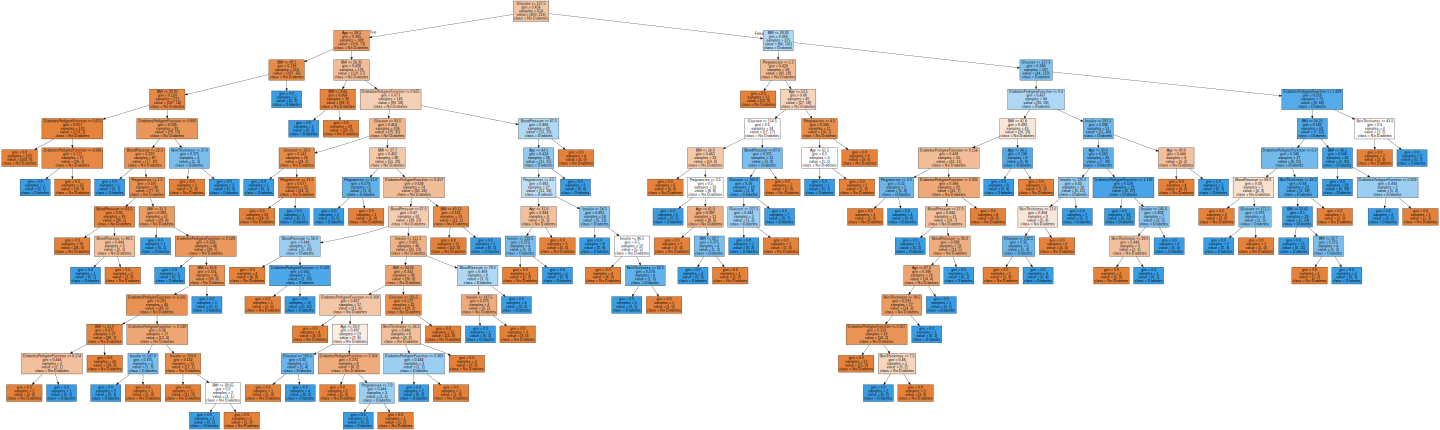

In [10]:
plot_tree(dt_gini)

__`Step 10`__ __Predicted Values__ <br>
a) Check the predicted values for the test dataset using the method __predict()__ in your model<br>

In [11]:
y_pred = dt_gini.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

b) Check the predicted class probabilities for the test dataset using the method __predict_proba()__ in your model<br>

In [12]:
y_pred_prob = dt_gini.predict_proba(X_test)
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

__`Step 11`__ Check the depth (__get_depth()__), the number of nodes (__.tree_.node_count__) and the number of leaves (__get_n_leaves()__) of the model __dt_gini__

In [13]:
print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')

The defined three has a depth of 14, 203 nodes and a total of 102 leaves.


### <font color='#BFD72F'>criterion | </font>  <font color='#3a7f8f'>Changing the split criteria</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'gini'`

- A decision tree is split by using the impurity - a measure of homogeneity of the labels on the node.
- There are two possibilities in sklearn:
    - Gini Index - Gini Impurity measures the divergences between the probability distributions of the target attribute’s values and splits a node such that it gives the least amount of impurity.
    - Entropy - Information gain uses the entropy measure as the impurity measure and splits a node such that it gives the most amount of information gain.
    
- In most cases, the choice of splitting criteria will not make much difference in the performance of the model. However, and according to the "No free lunch Theorem", each criterion is superior in some cases and inferior in others.
- The main difference is that entropy might be a little slower to compute because it requires you to compute a logarithmic function

__`Step 12`__ - Create an instance of DecisionTreeClassifier named as __dt_entropy__ and define the parameter __criterion='entropy'__, and fit the data to your model. Check the results.

In [14]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy')
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

__`Step 13`__ - Check the results from the two previous created trees.

In [15]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Gini','Entropy'])
show_results(df, dt_gini, dt_entropy)

,Time,Train,Test
Gini,0.009+/-0.0,1.0+/-0.0,0.702+/-0.06
Entropy,0.01+/-0.0,1.0+/-0.0,0.723+/-0.07


<font color='#BFD72F'>**Note:**</font> Ooops! Our trees seem to be **overfitting**... Let's see how to change that!

<br>

# 3. Avoiding Overfitting <a class="anchor" id="3rd-bullet"></a>
[Back to Contents](#toc)

One of the main limitations of Decision Trees is their propensity to **overfit**.

Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood.

In decision trees, we can have two pruning approaches:

1. In **prepruning**, we stop growing the tree earlier, before it perfectly classifies the training set. For that, we need to define some thresholds and stopping criterias. One possible example is the number of levels/layers that the tree has.

2. In **postpruning**, we allow the tree to perfectly classify the training set (by creating a full grown up tree), and then post prune the tree in order to avoid overfitting.

## <font color='#BFD72F'>Prepruning a tree</font> <a class="anchor" id="toc"></a>

* [3.1. - The maximum depth](#depth)
* [3.2. - The maximum number of leaf nodes](#nodes)
* [3.3. - The minimum samples in each leaf](#leaf)
* [3.4. - The maximum number of features](#features)
* [3.5. - The minimum number of samples required to split](#samples)
* [3.6. - The minimum weight fraction in each leaf](#weight)
* [3.7. - The splitter criteria](#splitter)

### <font color='#BFD72F'>max_depth | </font>  <font color='#3a7f8f'>Changing the maximum depth of a tree</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'None'`



- If you don’t specify a depth for the tree, scikit-learn will expand the nodes until all leaves are pure (unless other parameters are defined)
- The deeper you allow your tree to grow, the more complex your model will be. 
- __`High Depth`__ - This will increase the number of slipts and captures more information about the data. However, this is one of the major causes associated with overfitting, since your model will fit perfectly for the training data, and it will not be able to generalize well on test. 
- __`Low Depth`__ - This is one of the major causes associated with underfitting.


__`Step 14`__ - Create an instance of DecisionTreeClassifier named as __dt_depth2__ and define the parameter __max_depth=2__, and fit the data to your model. Check the results.

In [16]:
dt_depth2 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [17]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth2'])
show_results(df, dt_gini, dt_depth2)

,Time,Train,Test
full,0.008+/-0.0,1.0+/-0.0,0.703+/-0.07
depth2,0.004+/-0.0,0.769+/-0.01,0.755+/-0.06


__`Step 15`__ Visualize the new decision tree.

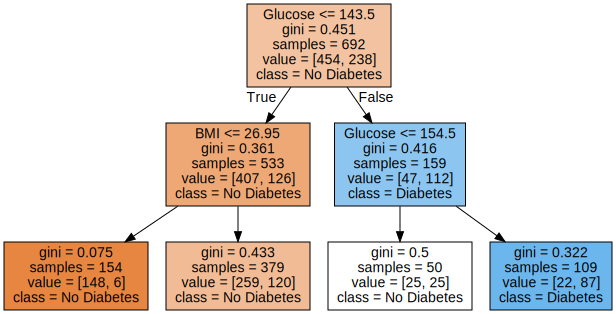

In [18]:
plot_tree(dt_depth2)

### <font color='#BFD72F'>max_leaf_nodes |</font> <font color='#3a7f8f'>Define the total number of leaf nodes</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'None'`

__`Step 16`__ - Create an instance of DecisionTreeClassifier named as __dt_maxleaf5__ and define the parameter __max_leaf_nodes=5__, and fit the data to your model. Compare the results with the baseline model.

In [19]:
dt_maxleaf5 = DecisionTreeClassifier(max_leaf_nodes = 5).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Baseline','dt_maxleaf5'])
show_results(df,dt_gini, dt_maxleaf5)

,Time,Train,Test
Baseline,0.008+/-0.0,1.0+/-0.0,0.684+/-0.06
dt_maxleaf5,0.004+/-0.0,0.774+/-0.01,0.756+/-0.07


__`Step 17`__ Plot the decision tree __dt_maxleaf5__

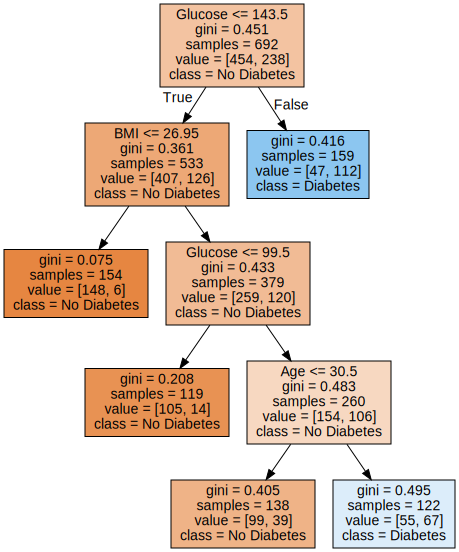

In [20]:
plot_tree(dt_maxleaf5)

### <font color='#BFD72F'>min_samples_leaf |</font> <font color='#3a7f8f'>Changing the minimum number of samples required to be at a leaf node</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 1`

- A leaf is a node without children
- It is used to control overfitting, by defining that each leaf has more than one element
- __`Small Values`__ - The tree will overfit
- __`Too high Values`__ - Can lead to underfitting

__`Step 18`__ - Create an instance of DecisionTreeClassifier named as __dt_min_sam200__ and define the parameter __min_samples_split=200__, and fit the data to your model

In [21]:
dt_min_sam200 = DecisionTreeClassifier(min_samples_leaf = 200).fit(X_train, y_train)

__`Step 19`__ - Create an instance of DecisionTreeClassifier named as __dt_min_sam500__ and define the parameter __min_samples_split=500__, and fit the data to your model. Compare the results between the baseline model and the models created in step12 and step13

In [22]:
dt_min_sam500 = DecisionTreeClassifier(min_samples_leaf = 500).fit(X_train, y_train)

In [23]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_min_sam1','dt_min_sam200','dt_min_sam500'])
show_results(df,dt_gini, dt_min_sam200, dt_min_sam500)

,Time,Train,Test
dt_min_sam1,0.008+/-0.0,1.0+/-0.0,0.687+/-0.05
dt_min_sam200,0.003+/-0.0,0.736+/-0.01,0.736+/-0.05
dt_min_sam500,0.003+/-0.0,0.651+/-0.01,0.651+/-0.07


__`Step 20`__ Plot the decision tree __dt_min_sam200__

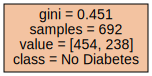

In [24]:
plot_tree(dt_min_sam500)

### <font color='#BFD72F'>max_features |</font> <font color='#3a7f8f'>Changing the number of features to consider when looking for the best split</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'None'`

- It is computationally heavy to look at all the features every single time, so you can just check some of them using the various max_features options
- It also allows to minimize overfitting - by choosing a reduced number of features, we can increase the stability of the tree and reduce variance and overfitting

There are several options (let's imagine we are dealing with 32 variables): <br>
`int` - The defined value is the number of maximum features to be considered at each split
    - A value of 10 will consider 10 features <br>
`float` - The defined value will be multiplied by the number of features and those are considered to each split 
    - A value of 0.5 will consider 16 features <br>
`auto` - The number of features considered is equal to sqrt(total number of features)
    - It will be considered 6 features <br>
`log2` - The number of features considered is equal to log2(total number of features)
    - It will be considered 5 features <br>
`None`- The number of features considered is equal to the total number of features
    - 32 variables will be considered <br>
    
The option to select will depend on the number of features you have, the computational intensity you want to reduce or the amount of overfitting you have, so if you have a high computational cost or you have a lot of overfitting, you can try with “log2” and depending on what that produces, you can either bring it slightly up using sqrt or take it down further using a custom float value.

__`Step 21`__ - Create the following instances of a DecisionTreeClassifier:
- where __max_features = None__ and name it as __dt_none__ (The baseline model)
- where __max_features = 2__ and name it as __dt_int__
- where __max_features = 0.5__ and name it as __dt_float__
- where __max_features = 'auto'__ and name it as __dt_auto__
- where __max_features = 'log2'__ and name it as __dt_log2__


Check the results.

In [25]:
dt_none = DecisionTreeClassifier(max_features = None).fit(X_train, y_train)
dt_int = DecisionTreeClassifier(max_features = 2).fit(X_train, y_train)
dt_float = DecisionTreeClassifier(max_features = 0.5).fit(X_train, y_train)
dt_auto = DecisionTreeClassifier(max_features = 'auto').fit(X_train, y_train)
dt_log2 = DecisionTreeClassifier(max_features = 'log2').fit(X_train, y_train)

In [26]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['None (Baseline)','Int','Float','Auto','Log2'])
show_results(df,dt_none, dt_int, dt_float, dt_auto, dt_log2)

,Time,Train,Test
None (Baseline),0.007+/-0.0,1.0+/-0.0,0.699+/-0.07
Int,0.004+/-0.0,1.0+/-0.0,0.676+/-0.07
Float,0.005+/-0.0,1.0+/-0.0,0.686+/-0.05
Auto,0.004+/-0.0,1.0+/-0.0,0.69+/-0.06
Log2,0.005+/-0.0,1.0+/-0.0,0.698+/-0.04


### <font color='#BFD72F'>min_samples_split |</font>  <font color='#3a7f8f'>Changing the minimum number of samples required to split an internal node</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 2`

- An internal node can have further splits (on the other hand, leafs is a node without children)
- It is used to control overfitting
- __`High Values`__ - Prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
- __`Too high Values`__ - Can lead to underfitting

__`Step 22`__ - Create an instance of DecisionTreeClassifier named as __dt_min10__ and define the parameter __min_samples_split=10__, and fit the data to your model.

In [27]:
# DO IT

__`Step 23`__ - Create an instance of DecisionTreeClassifier named as __dt_min500__ and define the parameter __min_samples_split=500__, and fit the data to your model. Check the results for both models.

In [28]:
# DO IT

__`Step 24`__ Plot the decision tree __dt_min500__

In [29]:
# DO IT

### <font color='#BFD72F'>min_weight_fraction_leaf |</font> <font color='#3a7f8f'>Changing the minimum number of samples required to be at a leaf node</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 0.0`

Is the fraction of the input samples required to be at a leaf node where weights are determined by sample_weight, this is a way to deal with class imbalance. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights for each class to the same value.

__`Step 24`__ - Create an instance of DecisionTreeClassifier named as __dt_min_weight__ and define the parameter __min_weight_fraction_leaf=0.15__, and fit the data to your model. Compare the results with the baseline model.

In [30]:
# DO IT

__`Step 25`__ Plot the decision tree __dt_min_weight__

In [31]:
# DO IT

### <font color='#BFD72F'>splitter| </font>  <font color='#3a7f8f'>Changing the splitter</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'best'`

If random, it selects a random feature and a random split in each feature. 
- It's less computation intensive than calculating the optimal split of every feature at every leaf.
- It should be less prone to overfitting.

__`Step 26`__ - Create an instance of DecisionTreeClassifier named as __dt_random__ and define the parameter __splitter='random'__, and fit the data to your model. Check the results.

In [32]:
# DO IT

In [33]:
# DO IT

<br>

## <font color='#BFD72F'>Postprunning a tree</font> <a class="anchor" id="toc"></a>

* [3.1. -  The complexity parameter](#ccp)

### <font color='#BFD72F'>ccp_alpha |</font> <font color='#3a7f8f'>Choose the complexity parameter used for Minimal Cost-Complexity Pruning.</font> <a class="anchor" id="ccp"></a><br><br>`default = '0.0'`

The DecisionTreeClassifier class in sklearn provides ccp_alpha as a parameter for post pruning. 
- The parameter __`ccp_alpha`__ provides a threshold for effective alphas, i.e. the process of pruning continues until the minimal effective alpha of the pruned tree is not greater than ccp_alpha. 
- The DecisionTreeClassifier class also provides a method __`cost_complexity_pruning_path`__ which implements the pruning process and returns the effective alphas(and the corresponding impurities of the pruned trees)
- The effective alpha is computed for each non-terminal node of the tree and the node with the weakest effective alpha(minimum) is pruned. This procedure is repeated recursively until there is only one node(the root node) left.

__`GOAL`__ To find an optimal value of effective alpha which gives the maximum validation/test set accuracy.

__`Step 27`__ <br>
- a) Create an instance of a DecisionTreeClassifier named as __dt_alpha__ and define the __random_state = 0__ <br>
- b) Compute the pruning path during Minimal Cost-Complexity Pruning by using the method __cost_complexity_pruning__ in your model and name the result as path
- c) From __path__, get the values of ccp_alphas by calling the attribute __.ccp_alphas__ and get the values of impurities by calling the attribute __.impurities__

In [34]:
dt_alpha = DecisionTreeClassifier(random_state=0)
path = dt_alpha.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

__`Step 28`__ - Create a plot, where in x you should represent the alphas and in y the impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

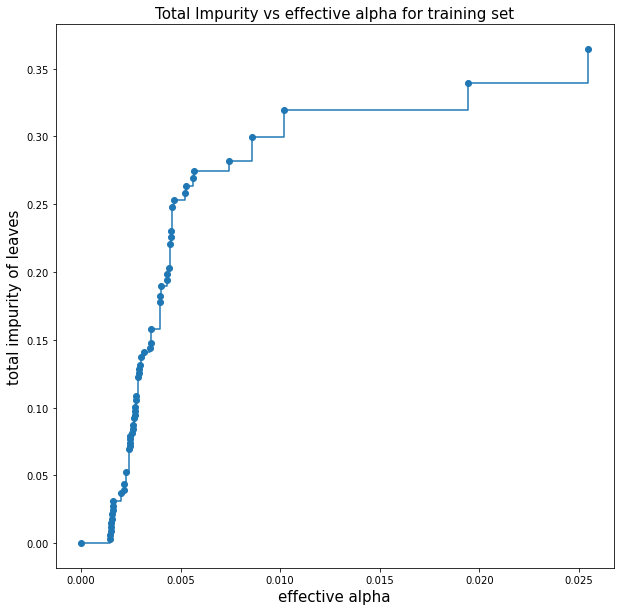

In [35]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha", fontsize=15)
ax.set_ylabel("total impurity of leaves", fontsize=15)
ax.set_title("Total Impurity vs effective alpha for training set", fontsize=15)

The zero value of alpha corresponds to minimum impurity (0 - unpruned tree) and as the value of alpha tends to infinity the tree tends to be more impure.

__`Step 29`__ - Build a forest of trees with different values of ccp_alpha values extracted from cost_complexity_pruning_path in order. The last tree will be the root node.

In [36]:
trees = []
for ccp_alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    trees.append(dt_alpha)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(trees[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08948830479978076


__`Step 30`__ - Plot the number of nodes and the tree depth as alpha increases.

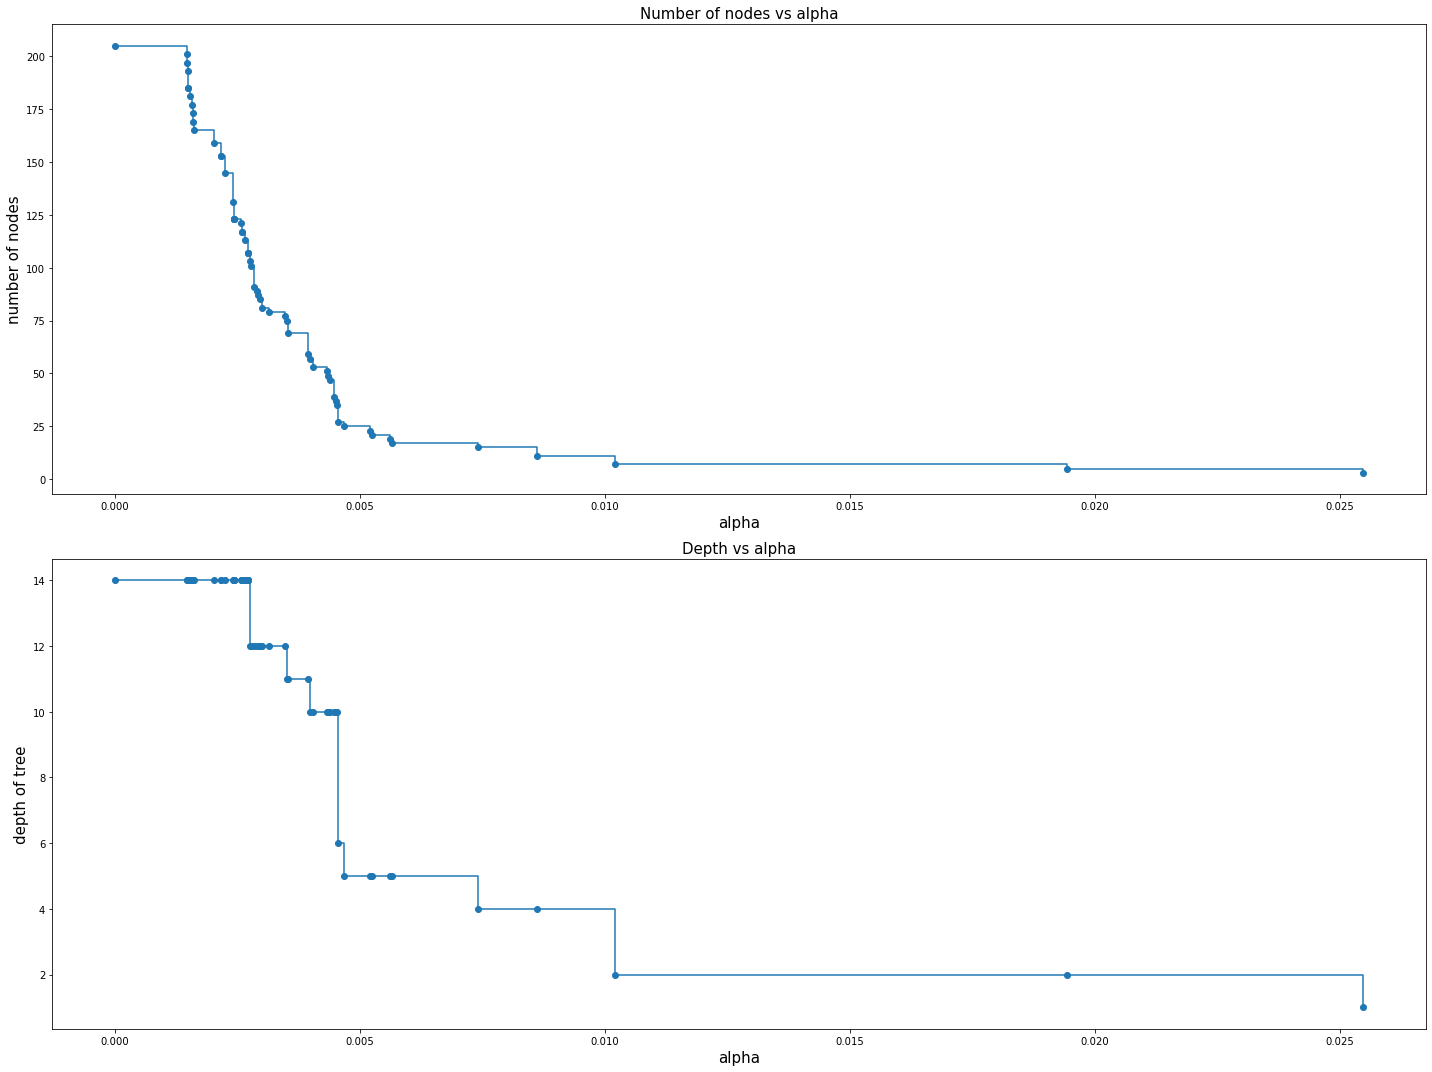

In [37]:
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.get_depth() for tree in trees]

fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha", fontsize=15)
ax[0].set_ylabel("number of nodes", fontsize=15)
ax[0].set_title("Number of nodes vs alpha", fontsize=15)
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha", fontsize=15)
ax[1].set_ylabel("depth of tree", fontsize=15)
ax[1].set_title("Depth vs alpha", fontsize=15)
fig.tight_layout()

The plot shows that with the zero value of effective alpha the tree generated has the highest number of nodes and is the deepest(grows to the maximum), while as the effective alpha increases the trees are more pruned and have relatively fewer nodes and less deeper.

__`Step 31`__ - Check the mean accuracy associated to the train and the test dataset according to the different values of alphas.

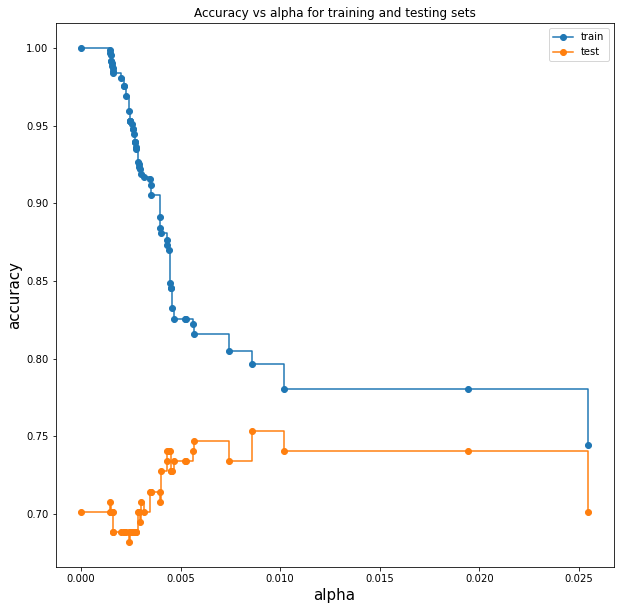

In [38]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel("alpha", fontsize=15)
ax.set_ylabel("accuracy", fontsize=15)
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- With the initial smaller values of alpha, there is a huge disparity between the training and test accuracy scores. When the alpha value increases, the training accuracy decreases, and the test accuracy increases until we reach the optimal point(highest test accuracy score). <br>
- In the plot, the optimal point lies between 0.008 to 0.010 of alpha, where we get the optimal pruned tree. Beyond this point with an increase in alpha, the tree is over pruned. This eventually leads to under-fitting, both the training and test accuracy scores decrease.

__`Step 32`__ - Check the mean accuracy for a decision tree with __ccp_alpha=0__ and a second decision tree with __ccp_alpha=0.009__

In [39]:
dt_alpha0 = DecisionTreeClassifier(ccp_alpha=0).fit(X_train, y_train)
dt_alpha0009 = DecisionTreeClassifier(ccp_alpha=0.009).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_alpha0','dt_alpha0009'])
show_results(df,dt_alpha0, dt_alpha0009)

,Time,Train,Test
dt_alpha0,0.009+/-0.0,1.0+/-0.0,0.699+/-0.06
dt_alpha0009,0.008+/-0.0,0.779+/-0.01,0.747+/-0.08


__`Step 33`__ Check the best alpha for the best model according to the test scores and the scores associated to the train and the test by using the best ccp_alpha.

In [40]:
index_best_model = np.argmax(test_scores)
best_model = trees[index_best_model]
print('ccp_alpha of best model: ',trees[index_best_model])
print('_____________________________________________________________')
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

ccp_alpha of best model:  DecisionTreeClassifier(ccp_alpha=0.00860695851246833, random_state=0)
_____________________________________________________________
Training accuracy of best model:  0.7964169381107492
Test accuracy of best model:  0.7532467532467533


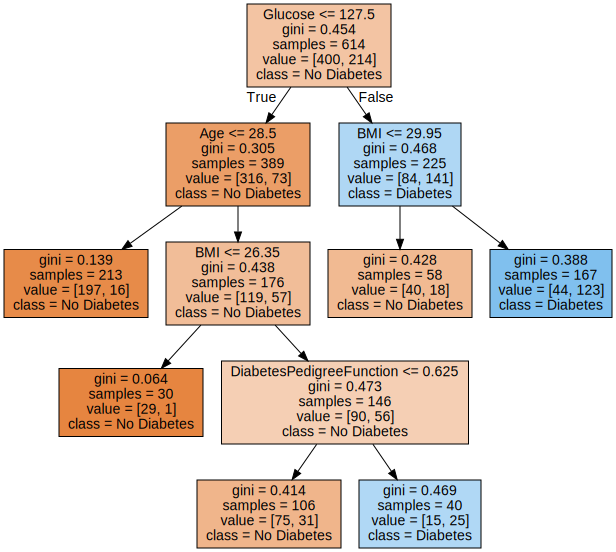

In [41]:
dt_postprunning = DecisionTreeClassifier(ccp_alpha = 0.00860695851246833).fit(X_train, y_train)
plot_tree(dt_postprunning)

<br>

# 4. Use a decision tree to evaluate feature importance <a class="anchor" id="4th-bullet"></a>
[Back to Contents](#toc)

__`Step 34`__ Calculate the feature importance using the split criteria 'Gini' and 'Entropy'

In [42]:
gini_importance = DecisionTreeClassifier().fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_

__`Step 35`__ Plot the feature importances for both criterions

<AxesSubplot:xlabel='Value', ylabel='Col'>

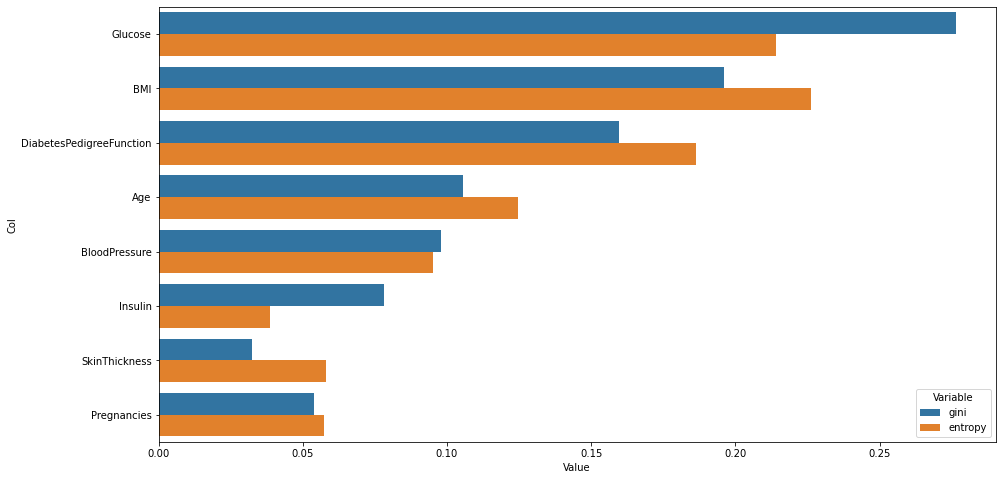

In [43]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)